In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset and displaying the first 5 rows

df = pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield_df.csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [4]:
# Finding the number if unique values in each column

df.nunique()

Unnamed: 0                       28242
Area                               101
Item                                10
Year                                23
hg/ha_yield                      11514
average_rain_fall_mm_per_year      100
pesticides_tonnes                 1673
avg_temp                          1831
dtype: int64

In [5]:
# We will drop the "Unnamed: 0" column

df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
# First let us categorize our features and target variables

features = df.drop(columns = ["hg/ha_yield"])
target = df["hg/ha_yield"]

features.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37
3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,Albania,Soybeans,1990,1485.0,121.0,16.37


In [7]:
df["Item"].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [8]:
features["Item"] = features["Item"].str.replace(", paddy", "Paddy", regex = False)
features["Item"].unique()

array(['Maize', 'Potatoes', 'RicePaddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [9]:
features["Item"] = features["Item"].str.replace(" and others", "", regex = False)
features["Item"].unique()

array(['Maize', 'Potatoes', 'RicePaddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains', 'Yams'], dtype=object)

In [10]:
# None of our columns contain low or high cardinality so we do not need to drop any of them

features.select_dtypes("object").head()

,Area,Item
0,Albania,Maize
1,Albania,Potatoes
2,Albania,RicePaddy
3,Albania,Sorghum
4,Albania,Soybeans


In [11]:
features.select_dtypes("number").head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1990,1485.0,121.0,16.37
1,1990,1485.0,121.0,16.37
2,1990,1485.0,121.0,16.37
3,1990,1485.0,121.0,16.37
4,1990,1485.0,121.0,16.37


<AxesSubplot:>

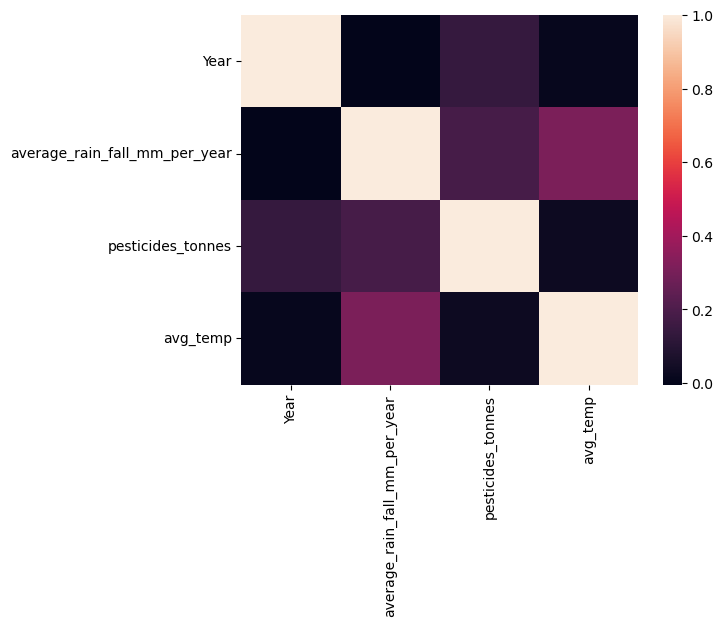

In [12]:
# Let us find features with high-corelation to each other

corr = features.select_dtypes("number").corr()
sns.heatmap(corr)

In [13]:
# From the above heatmap it is plain to see none of the features have a high co-relation to each other

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ MB


In [14]:
# We can drop "Area" column as well because when we do one-hot encoding, the 101 unique values will make our features dataframe have 101 extra columns which will lead to high dimensionality

# features.drop(columns = "Area", inplace = True)
features.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,RicePaddy,1990,1485.0,121.0,16.37
3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,Albania,Soybeans,1990,1485.0,121.0,16.37


In [15]:
# We will be making a pipeline with OneHotEncoder and Ridge Regression

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

model =  make_pipeline(
    OneHotEncoder(),
    Ridge()
)

In [16]:
model.fit(features, target)

Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

In [17]:
features.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,RicePaddy,1990,1485.0,121.0,16.37
3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,Albania,Soybeans,1990,1485.0,121.0,16.37


In [18]:
predictions = model.predict(features)
predictions = pd.Series(predictions)
predictions.head()

0     11897.025239
1    169668.196381
2     19625.048158
3        72.227240
4    -10714.880002
dtype: float64

In [19]:
target.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64

In [20]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean Absolute Error:", mae(target, predictions))

Mean Absolute Error: 29123.27867897685


OneHotEncoder + Ridge = 29110.6 <br>
OneHotEncoder + LinearRegression = 29144.0

In [21]:
# What if we don't drop "Area" Column?
# We forgot to build a Baseline Model so let's do that now

avg = target.agg(np.mean)
avg

77053.33209404434

In [22]:
baseline_predictions = [avg] * len(target)
len(baseline_predictions)

28242

In [23]:
print("Mean Absolute Error:", mae(target, baseline_predictions))

Mean Absolute Error: 64242.06802597714


Our Best Model has a MAE of 29110.6 and our Baseline Model has a MAE of 64242.0

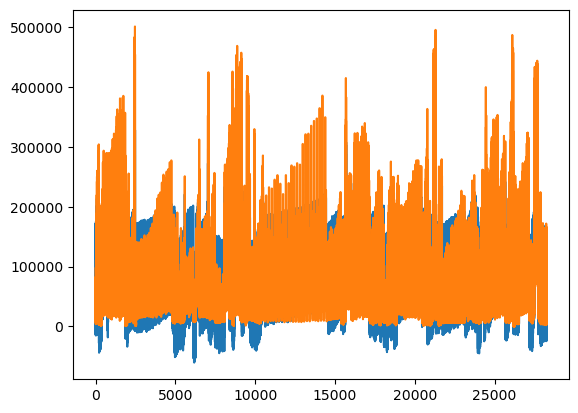

In [24]:
plt.plot(predictions)
plt.plot(target)

plt.show()